In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils_v2 import *
# from models import 

In [13]:
torch.cuda.empty_cache()

#### Goose and Jester

In [14]:
val_dates = ['171021','171023','180711','180714']
test_dates = ['171020','171022','180712','180713']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/'
# test_imbalance(load_path, val_dates, test_dates, bad_dates, test_train=True)

In [15]:
CH = 'all'
device = torch.device("cuda:1")
# device = torch.device('cuda')

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=256)

In [16]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 62, 100, 10])
torch.Size([256, 1])
256
256
256


date:180327, rec:008, time:1732.0, label:0.0


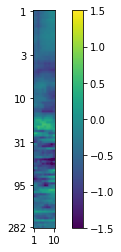

date:180327, rec:007, time:6411.0, label:0.0


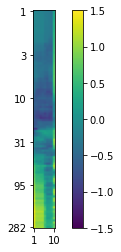

date:180327, rec:007, time:2850.0, label:0.0


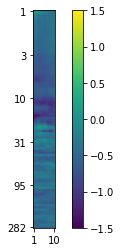

date:180411, rec:006, time:7144.0, label:0.0


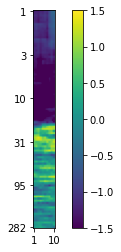

date:180331, rec:007, time:3317.0, label:0.0


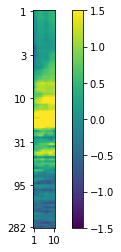

date:180327, rec:006, time:3847.0, label:1.0
date:180413, rec:001, time:5122.0, label:0.0


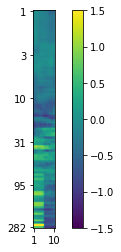

date:180414, rec:004, time:6815.0, label:1.0
date:180323, rec:001, time:6643.0, label:1.0
date:180413, rec:003, time:1010.0, label:0.0


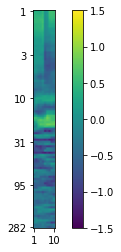

date:180325, rec:002, time:6005.0, label:1.0
date:180324, rec:008, time:2568.0, label:0.0


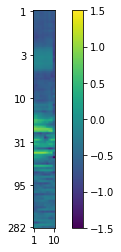

date:180325, rec:005, time:5692.0, label:1.0
date:180324, rec:003, time:3597.0, label:1.0
date:180324, rec:003, time:320.0, label:1.0
date:180331, rec:005, time:1459.0, label:1.0
date:180411, rec:004, time:3283.0, label:1.0
date:180409, rec:003, time:2709.0, label:1.0
date:180325, rec:003, time:5242.0, label:1.0
date:180410, rec:005, time:4887.0, label:1.0
date:180414, rec:007, time:3957.0, label:0.0


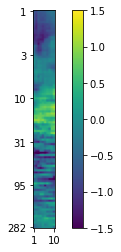

date:180414, rec:001, time:5513.0, label:1.0
date:180411, rec:006, time:711.0, label:1.0
date:180327, rec:005, time:5578.0, label:0.0


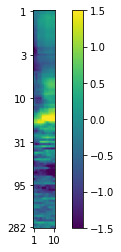

date:180331, rec:005, time:5898.0, label:1.0
date:180414, rec:001, time:1540.0, label:0.0


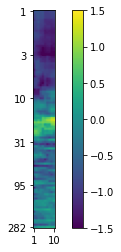

date:180414, rec:004, time:2230.0, label:1.0
date:180327, rec:007, time:3400.0, label:0.0


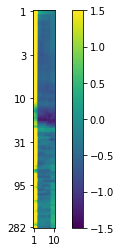

date:180324, rec:004, time:6422.0, label:1.0
date:180413, rec:008, time:807.0, label:1.0
date:180327, rec:002, time:935.0, label:0.0


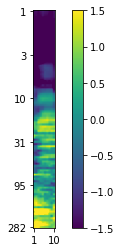

date:180413, rec:007, time:3642.0, label:1.0
date:180411, rec:002, time:7147.0, label:1.0
date:180323, rec:005, time:4148.0, label:1.0
date:180327, rec:007, time:3110.0, label:0.0


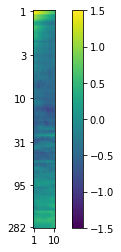

date:180414, rec:005, time:2935.0, label:0.0


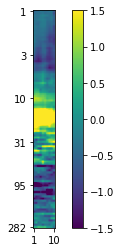

date:180401, rec:002, time:3346.0, label:1.0
date:180413, rec:002, time:5181.0, label:0.0


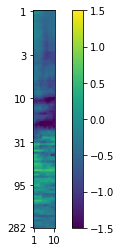

date:180410, rec:005, time:4672.0, label:1.0
date:180330, rec:008, time:1761.0, label:0.0


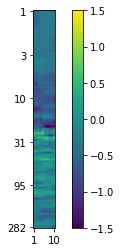

date:180413, rec:002, time:1320.0, label:0.0


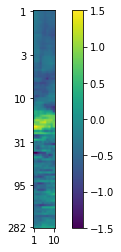

date:180401, rec:001, time:570.0, label:0.0


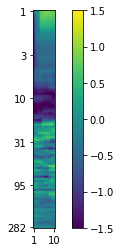

date:180329, rec:003, time:5716.0, label:1.0
date:180413, rec:008, time:5054.0, label:1.0
date:180323, rec:002, time:4346.0, label:1.0
date:180414, rec:001, time:7093.0, label:1.0
date:180325, rec:005, time:2124.0, label:1.0
date:180412, rec:002, time:992.0, label:1.0
date:180410, rec:002, time:450.0, label:1.0
date:180327, rec:004, time:2834.0, label:0.0


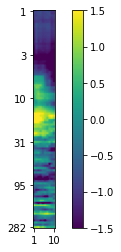

date:180325, rec:001, time:20.0, label:0.0


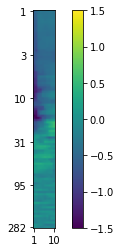

date:180409, rec:002, time:7022.0, label:1.0
date:180330, rec:009, time:3410.0, label:0.0


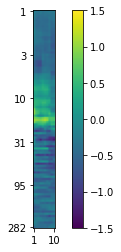

date:180413, rec:004, time:6622.0, label:1.0
date:180330, rec:008, time:6015.0, label:0.0


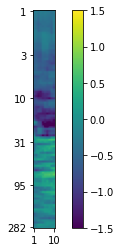

date:180330, rec:006, time:4742.0, label:1.0
date:180327, rec:007, time:1550.0, label:0.0


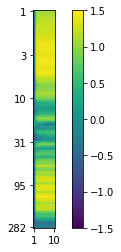

date:180413, rec:002, time:4001.0, label:0.0


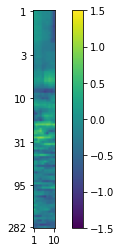

date:180330, rec:001, time:820.0, label:0.0


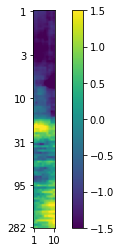

date:180401, rec:001, time:1170.0, label:0.0


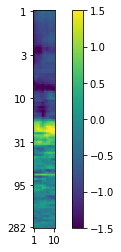

date:180410, rec:003, time:5745.0, label:1.0
date:180327, rec:001, time:6802.0, label:0.0


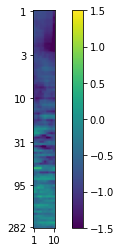

date:180330, rec:007, time:1032.0, label:1.0
date:180330, rec:009, time:5021.0, label:0.0


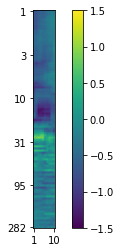

date:180413, rec:002, time:5691.0, label:0.0


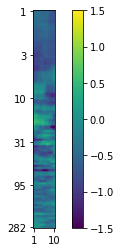

date:180325, rec:007, time:5803.0, label:0.0


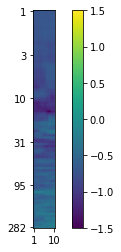

date:180330, rec:007, time:2658.0, label:1.0
date:180413, rec:004, time:360.0, label:0.0


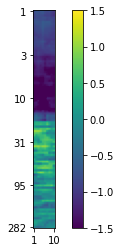

date:180413, rec:003, time:6491.0, label:0.0


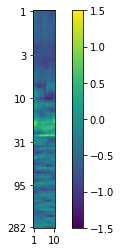

date:180331, rec:007, time:3397.0, label:0.0


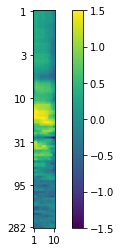

date:180325, rec:001, time:540.0, label:0.0


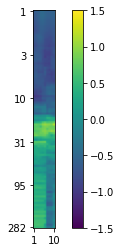

date:180325, rec:002, time:5428.0, label:1.0
date:180413, rec:002, time:4921.0, label:0.0


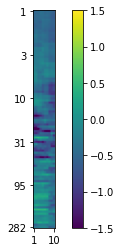

date:180413, rec:004, time:5231.0, label:1.0
date:180413, rec:001, time:2470.0, label:0.0


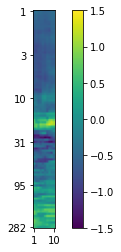

date:180331, rec:001, time:2240.0, label:0.0


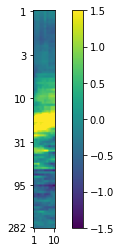

date:180322, rec:007, time:1657.0, label:0.0


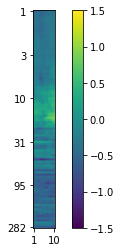

date:180410, rec:005, time:1638.0, label:0.0


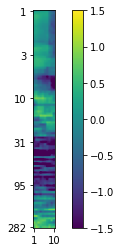

date:180323, rec:002, time:6341.0, label:1.0
date:180327, rec:007, time:1320.0, label:0.0


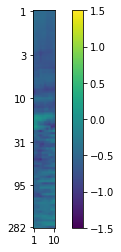

date:180329, rec:001, time:1704.0, label:0.0


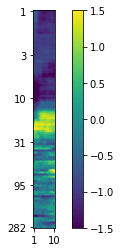

date:180413, rec:003, time:1580.0, label:0.0


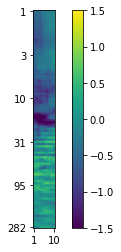

date:180322, rec:004, time:4119.0, label:1.0
date:180413, rec:002, time:5331.0, label:0.0


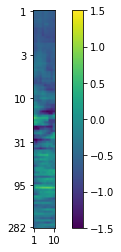

date:180331, rec:007, time:2887.0, label:0.0


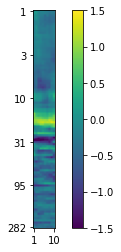

date:180331, rec:001, time:3144.0, label:1.0
date:180331, rec:007, time:4167.0, label:0.0


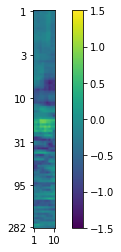

date:180329, rec:006, time:6874.0, label:1.0
date:180322, rec:005, time:360.0, label:1.0
date:180323, rec:002, time:790.0, label:1.0
date:180414, rec:001, time:5713.0, label:1.0
date:180324, rec:003, time:1419.0, label:1.0
date:180331, rec:001, time:1660.0, label:0.0


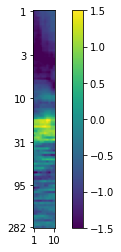

date:180324, rec:003, time:670.0, label:1.0
date:180331, rec:001, time:1810.0, label:0.0


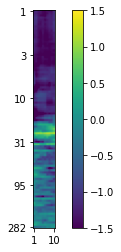

date:180325, rec:005, time:754.0, label:1.0
date:180410, rec:006, time:4309.0, label:1.0
date:180323, rec:004, time:4689.0, label:1.0
date:180413, rec:004, time:120.0, label:0.0


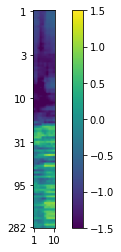

date:180401, rec:001, time:180.0, label:0.0


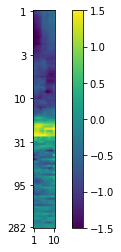

date:180412, rec:002, time:5834.0, label:1.0
date:180327, rec:007, time:5561.0, label:0.0


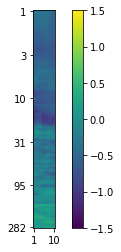

date:180325, rec:001, time:750.0, label:0.0


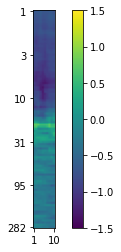

date:180410, rec:003, time:310.0, label:1.0
date:180331, rec:001, time:4155.0, label:1.0
date:180412, rec:005, time:1437.0, label:1.0
date:180327, rec:008, time:4503.0, label:0.0


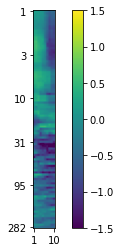

date:180331, rec:007, time:3207.0, label:0.0


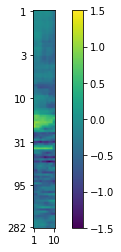

date:180327, rec:007, time:2050.0, label:0.0


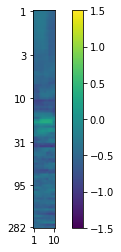

date:180329, rec:006, time:4677.0, label:0.0


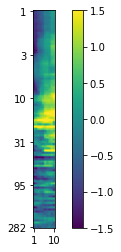

date:180330, rec:009, time:5451.0, label:0.0


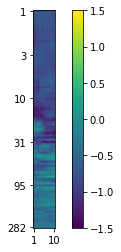

date:180322, rec:002, time:6241.0, label:1.0
date:180330, rec:008, time:1711.0, label:0.0


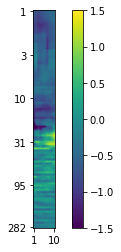

date:180324, rec:008, time:3980.0, label:1.0
date:180325, rec:006, time:2612.0, label:1.0
date:180325, rec:007, time:4553.0, label:0.0


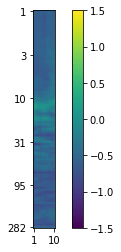

date:180322, rec:007, time:3529.0, label:0.0


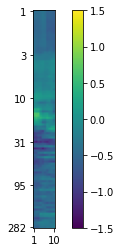

date:180330, rec:009, time:4091.0, label:0.0


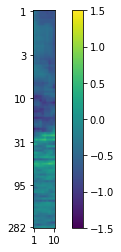

date:180329, rec:003, time:6176.0, label:1.0
date:180331, rec:001, time:1980.0, label:0.0


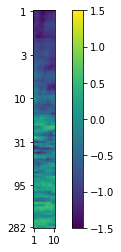

date:180412, rec:006, time:5328.0, label:0.0


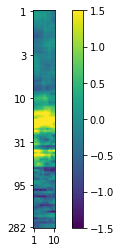

date:180412, rec:001, time:2220.0, label:1.0
date:180325, rec:006, time:6261.0, label:1.0
date:180412, rec:005, time:4577.0, label:1.0
date:180409, rec:004, time:6285.0, label:1.0
date:180330, rec:009, time:6741.0, label:0.0


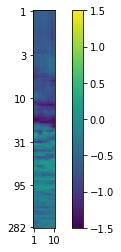

date:180409, rec:006, time:5118.0, label:0.0


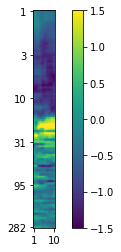

date:180327, rec:004, time:6964.0, label:1.0


In [17]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [18]:
class CNN(nn.Module):
    def __init__(self,p_dropout):
        super(CNN,self).__init__()
    
        # convolutional layer (sees 1x100x10 image tensor)
        self.conv1 = nn.Conv2d(in_channels=62, out_channels=2,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # convolutional layer (sees 2x50x5 tensor)
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=4,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # sees a layer 4x25x2
        self.fc1 = nn.Linear(4*25*2,1)
        
        # Max pooling
        self.pool = nn.MaxPool2d(2,2)
        # dropout layer 
        self.dropout = nn.Dropout(p_dropout)
         # batch normalization 
        self.bn1 = nn.BatchNorm2d(2)
        self.bn2 = nn.BatchNorm2d(4)
      
    def forward(self,x):
        
        x = x.float()
        
        conv_x1 = self.conv1(x)
        x = self.pool(F.relu(self.bn1(conv_x1))) # Convolution 1:

        conv_x2 = self.conv2(x)
        x = self.pool(F.relu(self.bn2(conv_x2))) # Convolution 2:

        x = x.view(x.shape[0],-1) # flatten image input
        
        x = self.dropout(x) # dropout
        x = self.fc1(x) # Fully connected layer
        
        return x, conv_x1, conv_x2

In [19]:
learning_rate = 0.001
tol = 0.01
p_dropout = 0.4

num_epochs = 51
model_name = 'CNN'
model_type = 'LR'
alpha = 0
loss_type = 'bce'
reg_type = 'none'
series = 'Goose_and_Jester'

device = torch.device("cuda:1")

model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss(reduction='mean')
model

CNN(
  (conv1): Conv2d(62, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.4, inplace=False)
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [20]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output, conv1, conv2 = model(data)
output.shape
criterion

BCELoss()

In [21]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc, conv1, conv2 = train(model, optimizer, criterion, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, criterion, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    if val_loss <= min(val_losses):
        best_epoch = epoch
        print(epoch)
        path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'
        torch.save(model.state_dict(), '{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        torch.save(conv1,'{}/conv_layer_1_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        torch.save(conv2,'{}/conv_layer_2_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        

Train loss for epoch 0: 0.0015544778434559703
Val loss for epoch 0: 0.003016547067090869
0
Train loss for epoch 1: 0.0010460895719006658
Val loss for epoch 1: 0.004200919531285763
Train loss for epoch 2: 0.000921667437069118
Val loss for epoch 2: 0.0044783297926187515
Train loss for epoch 3: 0.0008570867357775569
Val loss for epoch 3: 0.0033538066782057285
Train loss for epoch 4: 0.00082899205153808
Val loss for epoch 4: 0.004108608700335026
Train loss for epoch 5: 0.000791270867921412
Val loss for epoch 5: 0.0036638015881180763
Train loss for epoch 6: 0.0007882661884650588
Val loss for epoch 6: 0.00417459337040782
Train loss for epoch 7: 0.0007571032037958503
Val loss for epoch 7: 0.004336492624133825
Train loss for epoch 8: 0.0007448793621733785
Val loss for epoch 8: 0.004117236007004976
Train loss for epoch 9: 0.0007169211166910827
Val loss for epoch 9: 0.004211138468235731
Train loss for epoch 10: 0.0007476230966858566
Val loss for epoch 10: 0.004067563451826572
Train loss for epoc

In [11]:
series

'Goose_and_Jester'

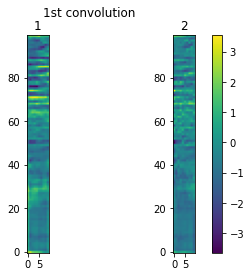

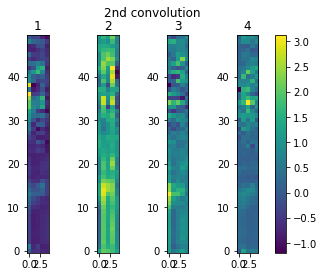

In [12]:
# =============================================================================
#  FILTERS CNN
# =============================================================================
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'

# 1st level
fig, axes = plt.subplots(1, 2)
fig.suptitle('1st convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv1[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
fig.savefig('{}/1st_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))


# 2nd level 
fig, axes = plt.subplots(1, 4)
fig.suptitle('2nd convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv2[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
fig.savefig('{}/2nd_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))

In [13]:
def plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, model_name):
    fig = plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_losses, linewidth = 1.5, label = 'train')
    plt.plot(val_losses, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Loss", fontsize = 15)
    plt.legend()
    plt.subplot(1,2,2)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_acc, linewidth = 1.5, label = 'train')
    plt.plot(validation_acc, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Accuracy", fontsize = 15)
    plt.legend()
    plt.show()
    return fig

In [15]:
p_dropout

0.4

In [3]:
fig = plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, 'CNN dropout = 0.4') 

NameError: name 'plot_loss_acc_2' is not defined

In [2]:
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures'
path_fig_model = '/CNN_10_sec_window'

fig.savefig(path_fig + path_fig_model + '/MODEL_{}_CH{}_LOSS{}_DROPOUT{}_EPOCH{}_SERIES_{}.png'.format(model_name,CH,loss_type,p_dropout,epoch,series))
plt.close(fig)

NameError: name 'fig' is not defined

In [11]:
epoch = 0
# model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model.load_state_dict(torch.load('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series)))

# loader = train_loader
# train_loss, train_acc, train_preds, train_preds_probs, train_labels, _, _, _, cases_wrong_train = evaluate(model, optimizer, criterion, loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
# print('train loss:{}, train accuracy:{}, train percentage postive:{}'.format(train_loss, train_acc, np.mean(np.concatenate(train_labels))))

NameError: name 'path' is not defined

In [1]:
def plot_confusion(test_preds, test_labels,title):
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    cm_test = confusion_matrix(labels_test, predictions_test)
    cm_test_percent = (cm_test.T/cm_test.astype(np.float).sum(axis=1)).T
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    sn.heatmap(cm_test, annot = True,  fmt = 'd', cmap='Blues')
    plt.title('{} Confusion Matrix'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplot(1,2,2)
    sn.heatmap(cm_test_percent, annot = True, cmap='Blues')
    plt.title('{} Confusion Matrix (Rate)'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    return fig

data_set = 'Train'
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'
fig = plot_confusion(train_preds, train_labels,data_set)
fig.savefig('{}/{}_confusion_matrix_CNN_CH_{}_DROPOUT_{}_EPOCH_{}_SERIES_{}.png'.format(path_fig,data_set,CH,p_dropout,epoch,series))

NameError: name 'train_preds' is not defined